### Sign Language Detection Model Code


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# deep learning libraries
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D,Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.metrics import f1_score,classification_report, confusion_matrix, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
train_df = pd.read_csv("/content/drive/MyDrive/final project guvi/train_sign.csv")
test_df =pd.read_csv( "/content/drive/MyDrive/final project guvi/test_sign.csv")

In [4]:
# Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [5]:
# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

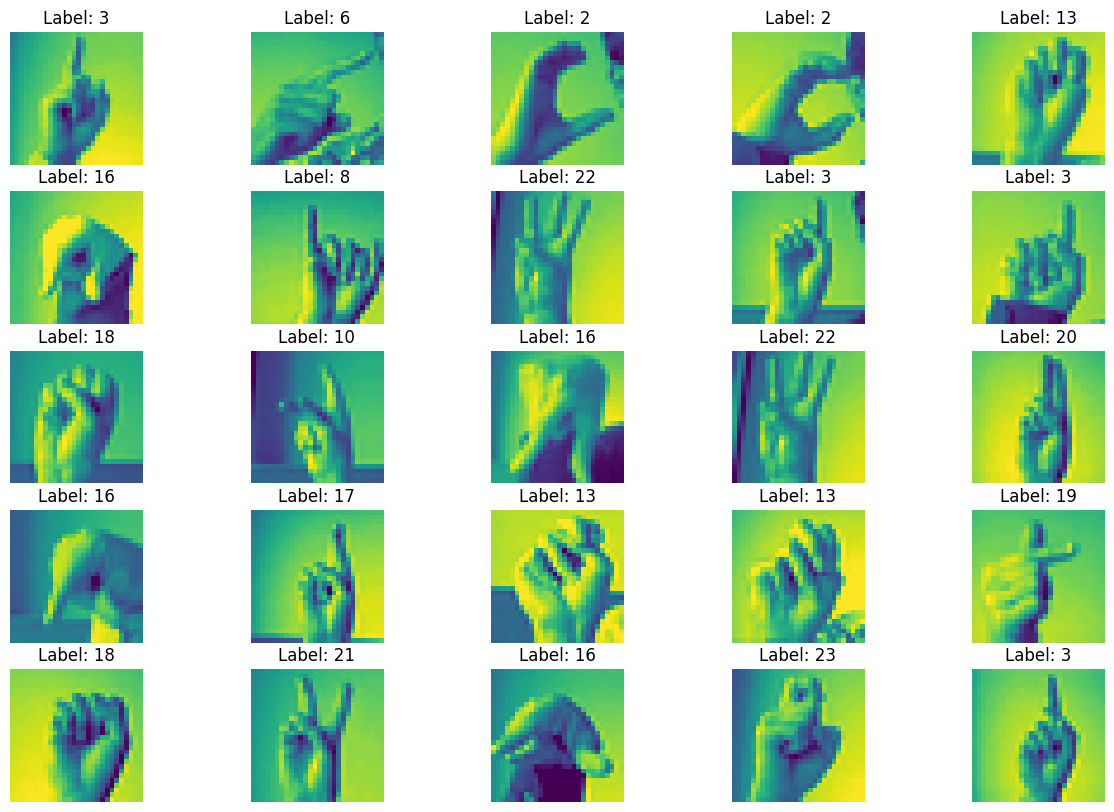

In [6]:
# plotting images from the train data set

def plot_images(img,labels):
  image_size = 28 # Define image_size here
  plt.figure(figsize=[15,10])
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i].reshape(image_size, image_size)) #,interpolation='nearest')
    plt.title(f'Label: {labels[i]}')
    # plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plot_images(X_train, y_train)

In [7]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.

In [9]:
 #Check the shape of the input data
print(f"Shape of X_train reshaping: {X_train.shape}")
print(f"Shape of X_test  reshaping: {X_test.shape}")

Shape of X_train reshaping: (27455, 28, 28, 1)
Shape of X_test  reshaping: (7172, 28, 28, 1)


In [8]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [11]:
# Check the shape of the one-hot encoded labels
print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")

Shape of y_train after one-hot encoding: (27455, 25)
Shape of y_test after one-hot encoding: (7172, 25)


###1.Training using Convolutional neural networks

In [9]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,409 (439.10 KB)

 Trainable params: 112,409 (439.10 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.2403 - loss: 2.4856 - val_accuracy: 0.7616 - val_loss: 0.6710
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.8091 - loss: 0.5580 - val_accuracy: 0.8475 - val_loss: 0.4073
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9240 - loss: 0.2226 - val_accuracy: 0.8965 - val_loss: 0.3538
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.9668 - loss: 0.1075 - val_accuracy: 0.9069 - val_loss: 0.3217
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - accuracy: 0.9788 - loss: 0.0654 - val_accuracy: 0.9151 - val_loss: 0.3406
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9011 - val_loss: 0.3907
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9077 - val_loss: 0.4411
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9897 - loss: 0.0303 - 

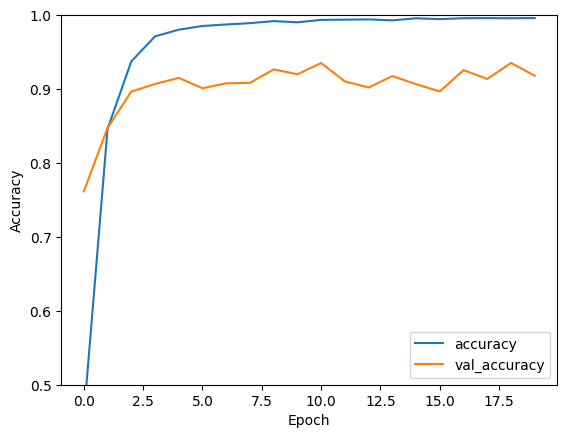

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

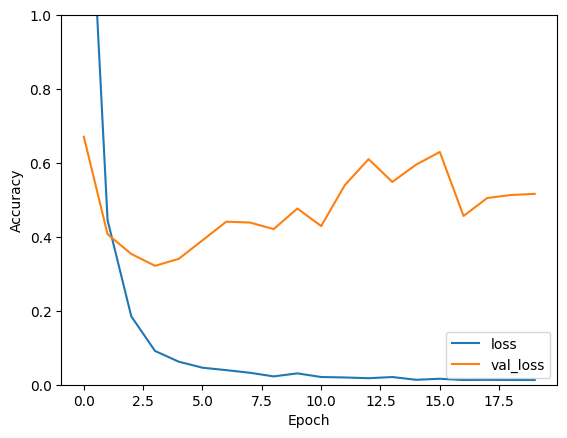

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# Evaluate the model
#test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import f1_score

# Assuming you have predictions and true labels from the CNN model
y_pred_cnn = model.predict(X_test)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the F1-score
f1_cnn = f1_score(y_test_labels, y_pred_cnn_labels, average='weighted')
print(f"F1 Score for CNN: {f1_cnn:.4f}")


A test accuracy of 90.62% and a test loss of 0.5664 for a CNN multi-class classifier can generally be considered good,
An F1 score of 0.9054 is a strong indicator of good model performance, particularly for a multi-class classification problem. The F1 score balances precision and recall, providing a single metric that accounts for both false positives and false negatives.

To summarize your model's performance:

Test Accuracy: 90.62%

Test Loss: 0.5664

F1 Score: 0.9054

###  Train the model with generators,Data Argumentation for improving performance

In [15]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
# Train the model with generators
#batch_size = 200
hist = model.fit(datagen.flow(X_train, y_train),#, batch_size=batch_size),
          validation_data=(X_test, y_test),
          steps_per_epoch=len(X_train),# // batch_size,
          epochs=10)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Assuming you have predictions and true labels from the CNN model
y_pred_cnn = model.predict(X_test)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the F1-score
f1_cnn = f1_score(y_test_labels, y_pred_cnn_labels, average='weighted')
print(f"F1 Score for CNN: {f1_cnn:.4f}")

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

### 2.Training with simple ArtificialNeural Network(ANN) model

In [16]:
model1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the input
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compile the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 733,465 (2.80 MB)

 Trainable params: 733,465 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)#, batch_size=300)

In [19]:

# Train the model with generators
#batch_size = 200
hist1 = model1.fit(datagen.flow(X_train, y_train),#, batch_size=batch_size),
          validation_data=(X_test, y_test),
          steps_per_epoch=len(X_train),# // batch_size,
          epochs=10)

Epoch 1/10
    4/27455 ━━━━━━━━━━━━━━━━━━━━ 9:45 21ms/step - accuracy: 0.0449 - loss: 3.6035  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  857/27455 ━━━━━━━━━━━━━━━━━━━━ 12:58 29ms/step - accuracy: 0.0454 - loss: 3.2453

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27455/27455 ━━━━━━━━━━━━━━━━━━━━ 29s 964us/step - accuracy: 0.0452 - loss: 3.2045 - val_accuracy: 0.0201 - val_loss: 3.2017
Epoch 2/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 39s 903us/step - accuracy: 0.0433 - loss: 3.1821 - val_accuracy: 0.0291 - val_loss: 3.2058
Epoch 3/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 40s 881us/step - accuracy: 0.0435 - loss: 3.1798 - val_accuracy: 0.0201 - val_loss: 3.1968
Epoch 4/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 26s 949us/step - accuracy: 0.0445 - loss: 3.1785 - val_accuracy: 0.0229 - val_loss: 3.1979
Epoch 5/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 40s 907us/step - accuracy: 0.0421 - loss: 3.1780 - val_accuracy: 0.0291 - val_loss: 3.2007
Epoch 6/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 40s 878us/step - accuracy: 0.0458 - loss: 3.1772 - val_accuracy: 0.0201 - val_loss: 3.1977
Epoch 7/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 41s 875us/step - accuracy: 0.0461 - loss: 3.1766 - val_accuracy: 0.0201 - val_loss: 3.2024
Epoch 8/10
27455/27455 ━━━━━━━━━━━━━━━━━━━━ 26s 930us/step - accur

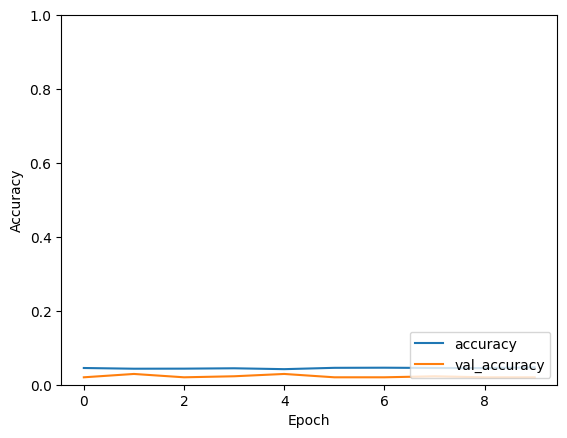

In [20]:
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [21]:
# Evaluate the model
#test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0203 - loss: 3.1988
Test loss: 3.198287010192871
Test accuracy: 0.020078081637620926


In [23]:
from sklearn.metrics import f1_score

# Assuming you have predictions and true labels from the CNN model
y_pred_ann = model1.predict(X_test)
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)
y_test_labels1 = np.argmax(y_test, axis=1)

# Calculate the F1-score
f1_ann = f1_score(y_test_labels1, y_pred_ann_labels, average='weighted')
print(f"F1 Score for ANN: {f1_ann:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 Score for ANN: 0.0008


## 3.transfer Learning and pre-trained model

Transfer learning involves leveraging a pre-trained model (usually trained on a large dataset like ImageNet) and fine-tuning it for our specific task. For the task of sign language detection, we have use a pre-trained model  VGG16 can also use ResNet50, or MobileNet as the base and then add custom layers for our specific classification task.

For transfer learning, resize the images to the input size expected by the pre-trained model from grayscale to RGB
(e.g., 224x224x3 for VGG16).

* Load the pre-trained model without the top layers.

* Train and Evaluate the Model

### Using VGG16 model

In [12]:
# Resize the images to (128,128, 3) for VGG16
X_train_resized = tf.image.resize(X_train, (128, 128))
X_test_resized = tf.image.resize(X_test, (128, 128))


In [13]:
# Repeat the grayscale channel to match the input shape (128, 128, 3)
#batch_size= 100
X_train_resized =tf.image.grayscale_to_rgb(X_train_resized)
X_test_resized = tf.image.grayscale_to_rgb(X_test_resized)

In [14]:
X_train_resized.shape

TensorShape([27455, 128, 128, 3])

### training model

In [ ]:
inputs =Input(shape= (128,128,3))
base_model = tf.keras.applications.VGG16(include_top =False,weights ='imagenet',input_tensor =inputs)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable =False

In [ ]:
x = base_model.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(25, activation='softmax')(x)



In [ ]:
model3 = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
# compile the model

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# displaying a summary report of the model
model3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │              

 Total params: 15,146,841 (57.78 MB)

 Trainable params: 431,129 (1.64 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
#defining call backs to preserve the best result
early = tf.keras.callbacks.EarlyStopping(patience=10,min_delta=0.001,restore_best_weights=True)
#  monitor='val_loss',
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
#     mode='min',
#     verbose=1


In [ ]:
# Train the model
#history3 = model3.fit(X_train_resized, y_train, validation_data=(X_test_resized, y_test), epochs=10, batch_size=32)

hist3 = model3.fit(X_train_resized, y_train, validation_data=(X_test_resized, y_test), epochs=10,callbacks=[early])



Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.7702 - loss: 0.7959 - val_accuracy: 0.9696 - val_loss: 0.1005
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9887 - loss: 0.0376 - val_accuracy: 0.9820 - val_loss: 0.0574
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9926 - loss: 0.0270 - val_accuracy: 0.9886 - val_loss: 0.0450
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9942 - loss: 0.0211 - val_accuracy: 0.9767 - val_loss: 0.0775
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9840 - val_loss: 0.0524
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9954 - loss: 0.0163 - val_accuracy: 0.9760 - val_loss: 0.0943
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9816 - val_loss: 0.0685
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9973 - loss: 0.0128 - 

In [ ]:
# Save the model

model3.save('/content/drive/MyDrive/final project guvi/sign_lang_pretrained_cnn_model.h5')

In [15]:
 # Load the model and make predictions
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/final project guvi/sign_lang_pretrained_cnn_model.h5')
#predictions = loaded_model.predict(X_test)

In [17]:
score = loaded_model.evaluate(X_test_resized, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 ━━━━━━━━━━━━━━━━━━━━ 1552s 7s/step - accuracy: 0.9887 - loss: 0.0443
Test loss: 0.04503735527396202
Test accuracy: 0.9885666370391846


In [20]:
# Assuming you have predictions and true labels from the CNN model
y_pred = loaded_model.predict(X_test_resized)
y_pred_label = np.argmax(y_pred, axis=1)
y_test_labels3 = np.argmax(y_test, axis=1)

# Calculate the F1-score
f1_cnn = f1_score(y_test_labels3, y_pred_label, average='weighted')
print(f"F1 Score for Pre-trained CNN: {f1_cnn:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1543s 7s/step
F1 Score for Pre-trained CNN: 0.9886


In [ ]:
# Calculate precision and recall
precision = precision_score(y_test_labels3, y_pred_label, average='weighted')
recall = recall_score(y_test_labels3, y_pred_label, average='weighted')

# Print the precision and recall
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9887
Recall: 0.9886


In [ ]:
# Calculate classification_report
class_report = classification_report(y_test_labels3, y_pred_label)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      0.97      0.99       310
           3       0.95      0.97      0.96       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.97      0.95      0.96       348
           7       0.96      0.98      0.97       436
           8       0.98      1.00      0.99       288
          10       0.99      1.00      0.99       331
          11       1.00      1.00      1.00       209
          12       1.00      0.99      1.00       394
          13       0.99      1.00      0.99       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.94      0.94      0.94       144
    

A test accuracy of 98% and a test loss of 0.0450 for a VGG16 multi-class classifier can generally be considered good, An F1 score of 0.9886 is a strong indicator of good model performance, particularly for a multi-class classification problem. The F1 score balances precision and recall, providing a single metric that accounts for both false positives and false negatives.

**To summarize your model's performance:**

Test loss: 0.04503735527396202

Test accuracy: 0.9885666370391846

F1 Score:0.9886

Precision: 0.9887

Recall: 0.988

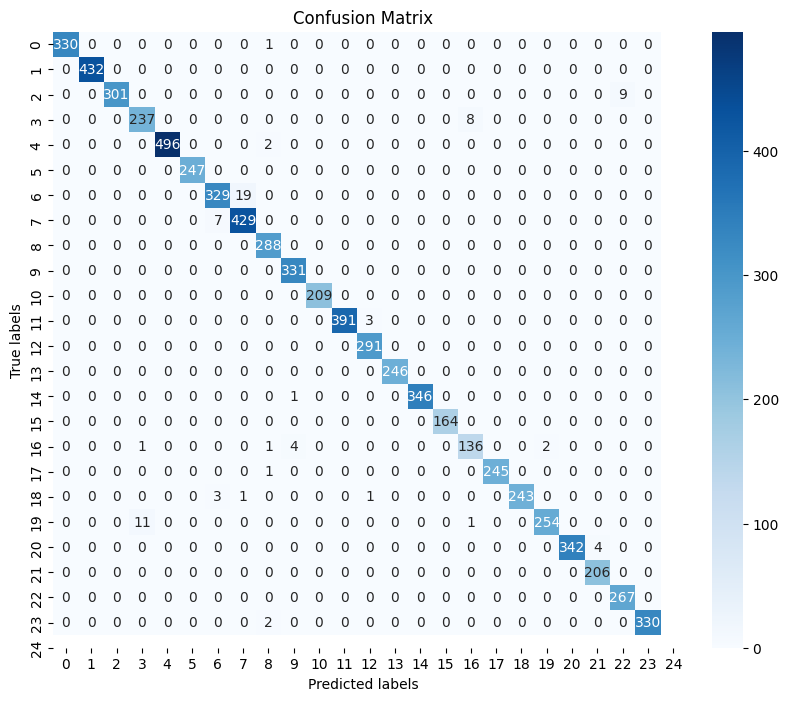

In [ ]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels3, y_pred_label)
# print("Confusion Matrix:")
# print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(25), yticklabels=range(25))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

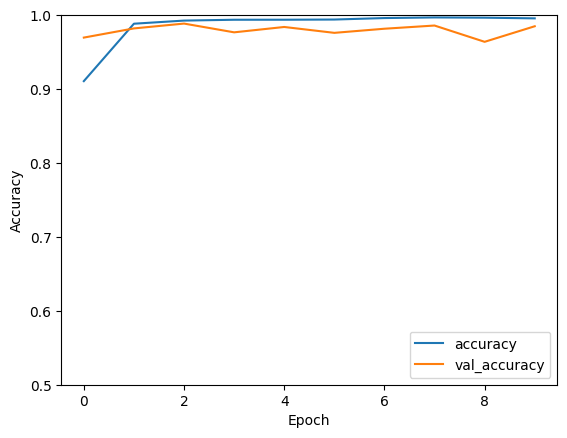

In [ ]:
plt.plot(hist3.history['accuracy'], label='accuracy')
plt.plot(hist3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### testing part

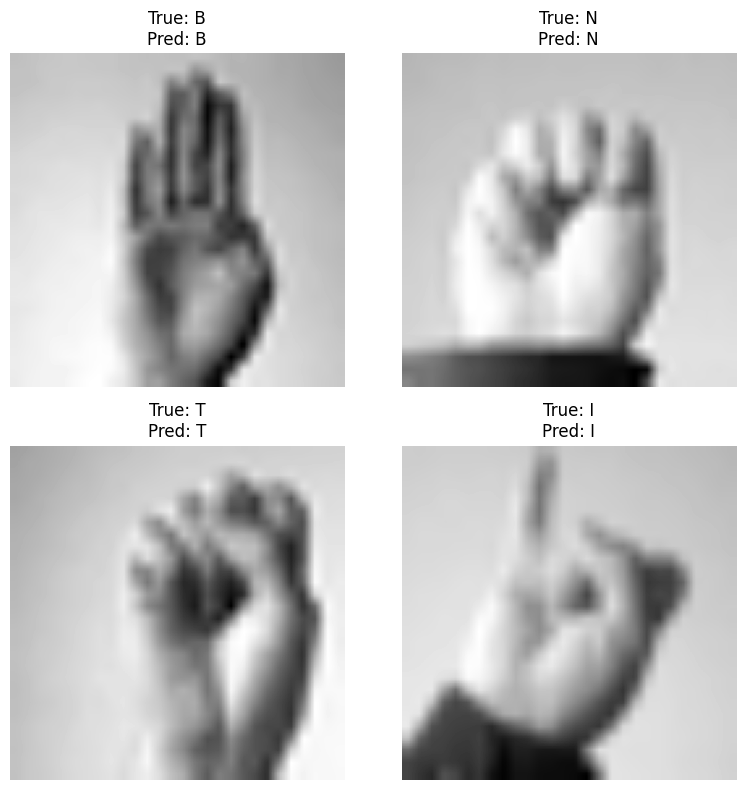

In [46]:
# Function to map class index to class label
def class_index_to_label(index):
    return chr(index + ord('A')) if index < 9 else chr(index + ord('A') + 1)
# # Select a few test images to display
num_images_to_display =4
X_test = np.array([cv2.resize(img, (128,128)) for img in X_test]) # Replace desired_width and desired_height with your desired dimensions

indices = np.random.choice(len(X_test), num_images_to_display, replace=False)


plt.figure(figsize=(8, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    true_label = class_index_to_label(y_test_labels3[idx])
    predicted_label = class_index_to_label(y_pred_label[idx])
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### to get single output on given index

Enter a number between 0 and 24: 10


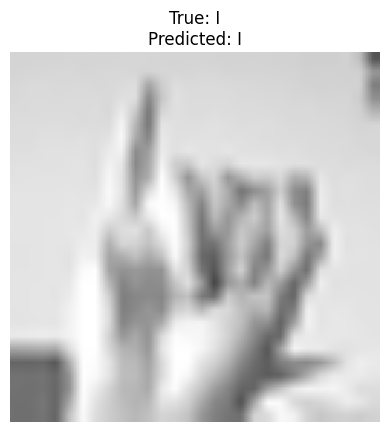

Predicted label: I


In [45]:
# Function to map class index to class label
def class_index_to_label(index):
   # return chr(index + ord('A')) if index < 9 else chr(index + ord('A') + 1)
    return [chr(i) for i in range(ord('A'), ord('Z')+1) if i not in (ord('J'), ord('Z'))][index]

# Function to test the model with a specific index
def test_model(index):
    if index < 0 or index >= len(X_test_resized):
        print("Index out of range. Please enter a number between 0 and 23.")
        return

# Get the corresponding test image and true label
    test_image = X_test_resized[index]
    test_image_np = test_image.numpy().squeeze()
    true_label = class_index_to_label(y_test_labels3[index])

    # Predict the label for the test image
    #prediction = model.predict(np.expand_dims(test_image, axis=0))
    predicted_label = class_index_to_label(y_pred_label[index])

    # Display the image and the true/predicted labels
    plt.imshow( test_image_np, cmap='gray')
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Example usage:
index = int(input("Enter a number between 0 and 24: "))
predicted_label = test_model(index)
print(f'Predicted label: {predicted_label}')


### how to give a img from web

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: D
Prediction probabilities: [[2.0005384e-09 3.9093107e-09 7.1509916e-08 9.7908139e-01 2.2951003e-08
  2.9655757e-07 1.9685872e-02 3.2803385e-08 4.1171083e-06 1.4569280e-11
  7.5549628e-10 4.3521293e-12 1.2250692e-03 1.4030222e-07 3.0741942e-09
  1.8113736e-09 5.8668834e-12 9.1131724e-08 4.3118864e-10 9.2926868e-11
  2.5718643e-06 6.1471404e-08 2.2812165e-07 7.3105472e-10 6.2052273e-12]]


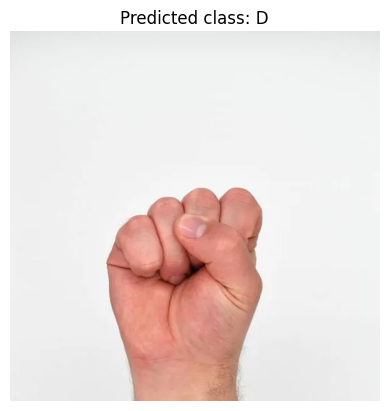

In [ ]:

from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, color_mode='rgb', target_size=(128, 128))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict the class of an image
def predict_image(img_path, model, class_labels):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    # Make a prediction
    predictions = model.predict(img_array)
    # Get the class with the highest probability
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label, predictions

# Function to map class indices to letters
def get_class_labels():
    # Assuming the classes are ordered alphabetically excluding 'J' and 'Z'
    classes = [chr(i) for i in range(ord('A'), ord('Z')+1) if i not in (ord('J'), ord('Z'))]
    return classes

# Test the image and display the result
class_labels = get_class_labels()
img_path = '/content/drive/MyDrive/final project guvi/s-sign-lang.webp'
predicted_class_label, predictions = predict_image(img_path,loaded_model, class_labels)

# Print the result
print(f'Predicted class: {predicted_class_label}')
print(f'Prediction probabilities: {predictions}')

# Display the image with the predicted class
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted class: {predicted_class_label}')
plt.axis('off')
plt.show()
